In [1]:
from forest_fire_clustering import FFC
from sklearn import datasets
import matplotlib.pyplot as plt
from itertools import cycle, islice
from sklearn.metrics.cluster import homogeneity_score

In [3]:
# Generate Dataset
data = datasets.make_blobs(n_samples=1000, random_state=8, cluster_std=[1.0, 2.5, 0.5],)
X = data[0]
y = data[1]

In [4]:
# Fit with various n_neighbors, fire_temp parameter setting
ffc_instances = []
for i in range(5, 100, 10):
    for j in range(1, 25, 2):
        ffc = FFC(n_neighbors=int(i), fire_temp=j)
        ffc.preprocess(X)
        ffc.fit()
        ffc_instances.append(ffc)

/gpfs/ysm/scratch60/gerstein/zc264/personal/cpsc453/envs/lib/python3.6/site-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 6103. The TBB threading layer is disabled.
  warnings.warn(problem)


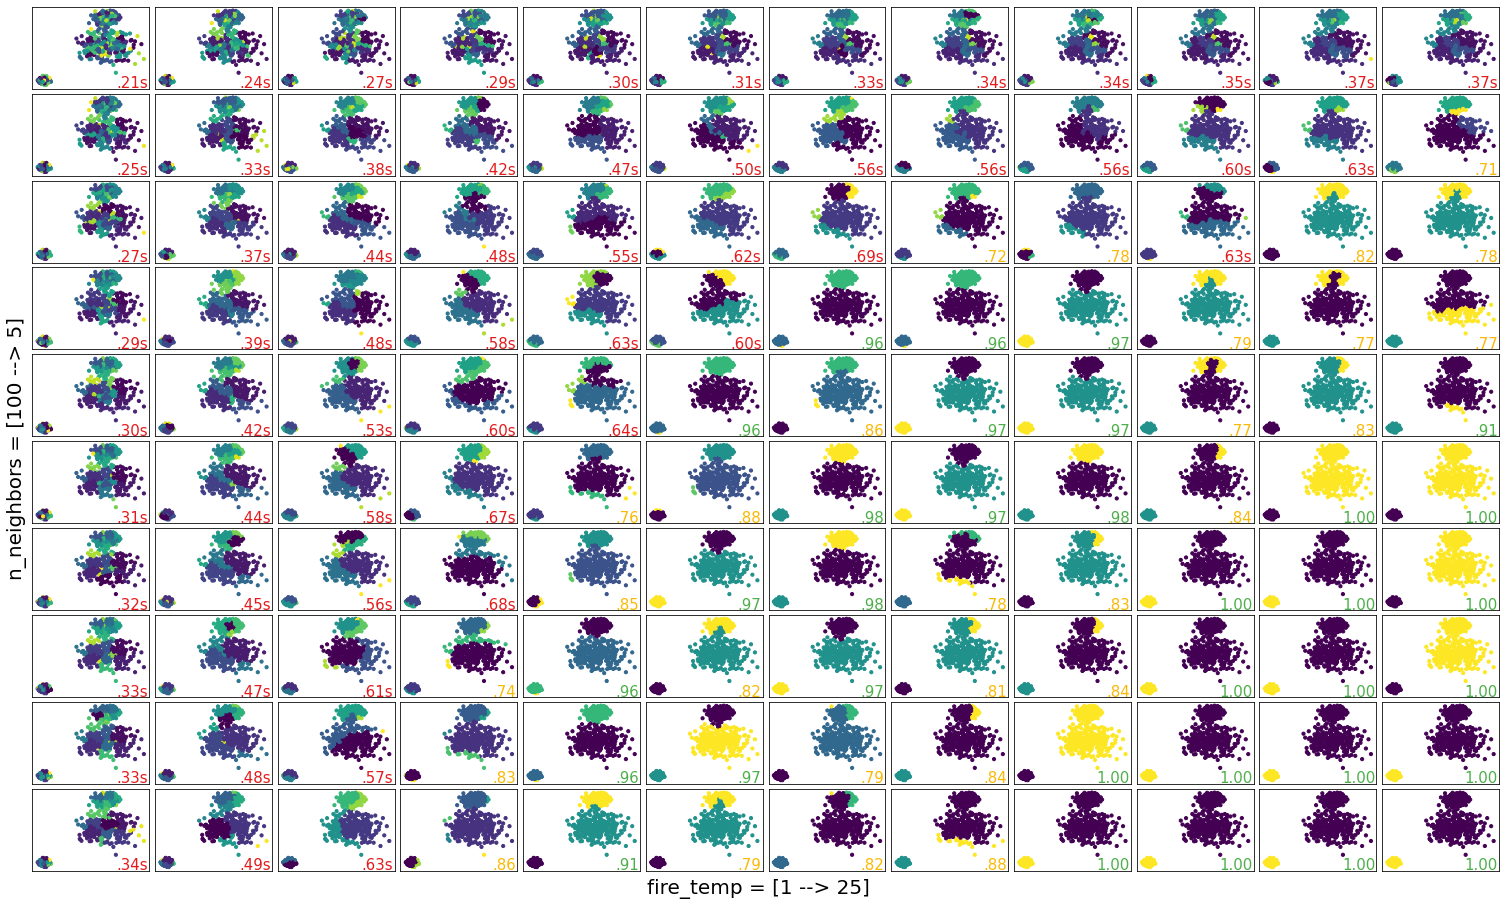

In [30]:
fig = plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.99, bottom=.03, top=.99, wspace=.05,
                    hspace=.06)

for plot_num, i in enumerate(ffc_instances):
    y_pred = i.cluster_labels.astype(int)
    plt.subplot(len(range(5, 100, 10)), len(range(1, 25, 2)), plot_num + 1)
    plt.scatter(X[:, 0], X[:, 1], s=10, c=y_pred)
    plt.xticks(())
    plt.yticks(())
    score = homogeneity_score(y_pred, y)
    if score > 0.9:
        plt.text(.99, .01, ('%.2f' % np.round(score, decimals=2)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right', color="#4daf4a")
    elif score > 0.7:
        plt.text(.99, .01, ('%.2f' % np.round(score, decimals=2)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right', color="#fbb905")
    else:
        plt.text(.99, .01, ('%.2fs' % np.round(score, decimals=2)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right', color="#e41a1c")

fig.text(0.5, 0.01, 'fire_temp = [1 --> 25]', ha='center', va='center', fontsize=20)
fig.text(0.01, 0.5, 'n_neighbors = [100 --> 5]', ha='center', va='center', rotation='vertical', fontsize=20)
plt.show();